In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import math
from sklearn.multiclass import OneVsRestClassifier

In [2]:
data = pd.read_csv("drug200.csv")
print(data)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [3]:
#data["label"] = LabelEncoder().fit_transform(data[["Drug"]])
#data["label"] = data[["Drug"]]
data_label = pd.get_dummies(data["Drug"])
data["Sex_Encoded"] = LabelEncoder().fit_transform(data[["Sex"]])
data["BP_Encoded"] = LabelEncoder().fit_transform(data[["BP"]])
data["Cholesterol_Encoded"] = LabelEncoder().fit_transform(data[["Cholesterol"]])
u_data = data[["Age","Sex_Encoded","BP_Encoded","Cholesterol_Encoded","Na_to_K"]]
print(u_data)

     Age  Sex_Encoded  BP_Encoded  Cholesterol_Encoded  Na_to_K
0     23            0           0                    0   25.355
1     47            1           1                    0   13.093
2     47            1           1                    0   10.114
3     28            0           2                    0    7.798
4     61            0           1                    0   18.043
..   ...          ...         ...                  ...      ...
195   56            0           1                    0   11.567
196   16            1           1                    0   12.006
197   52            1           2                    0    9.894
198   23            1           2                    1   14.020
199   40            0           1                    1   11.349

[200 rows x 5 columns]


/home/nitesh/PycharmProjects/LT1/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [4]:
result = pd.concat([u_data, data_label], axis=1)
u_data = result

In [5]:
x_data = u_data[["Age","Sex_Encoded","BP_Encoded","Cholesterol_Encoded","Na_to_K"]]
y_data = u_data.drop(["Age","Sex_Encoded","BP_Encoded","Cholesterol_Encoded","Na_to_K"], axis=1)
y_data

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
195,0,0,0,1,0
196,0,0,0,1,0
197,0,0,0,0,1
198,0,0,0,0,1


In [6]:
x_data
y_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DrugY   200 non-null    uint8
 1   drugA   200 non-null    uint8
 2   drugB   200 non-null    uint8
 3   drugC   200 non-null    uint8
 4   drugX   200 non-null    uint8
dtypes: uint8(5)
memory usage: 1.1 KB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=4)

In [8]:
X_train.to_numpy().shape

(140, 5)

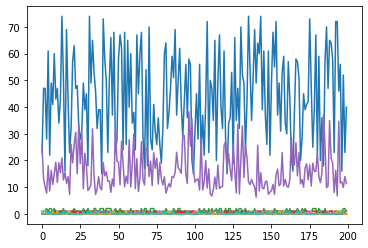

In [9]:
plt.plot(u_data, label="inline_label")

(140,)
(140,)


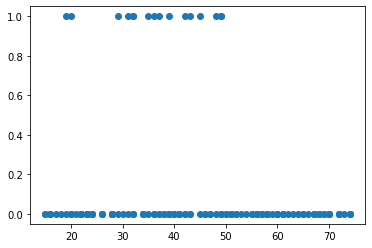

In [10]:
print(X_train["Age"].shape)
print(y_train["DrugY"].shape)
plt.scatter(X_train["Age"],y_train["drugA"])

## Logistic Regression(one vs rest)

In [17]:
from sklearn.svm import LinearSVC
from sklearn import metrics
ovr = OneVsRestClassifier(OneVsRestClassifier(LinearSVC(random_state=0))).fit(X_train.to_numpy(),y_train.to_numpy())
y_pred_lr = ovr.predict(X_test)
y_pred_lr

print(metrics.accuracy_score(y_pred_lr,y_test))

0.55


/home/nitesh/PycharmProjects/LT1/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/nitesh/PycharmProjects/LT1/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/nitesh/PycharmProjects/LT1/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/nitesh/PycharmProjects/LT1/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/nitesh/PycharmProjects/LT1/venv/lib/python3.8/site-pac

# Tree classifier

    100% |████████████████████████████████| 88.3MB 244kB/s eta 0:00:01  10% |███▎                            | 9.0MB 1.4MB/s eta 0:00:59    60% |███████████████████▍            | 53.5MB 1.2MB/s eta 0:00:29
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Stored in directory: /home/nitesh/.cache/pip/wheels/08/40/b7/fb2e8392888c91eb048b26ea0baa9aae808d056e3786204d0b
Successfully built opencv-python


TypeError: Image data of dtype <U8 cannot be converted to float

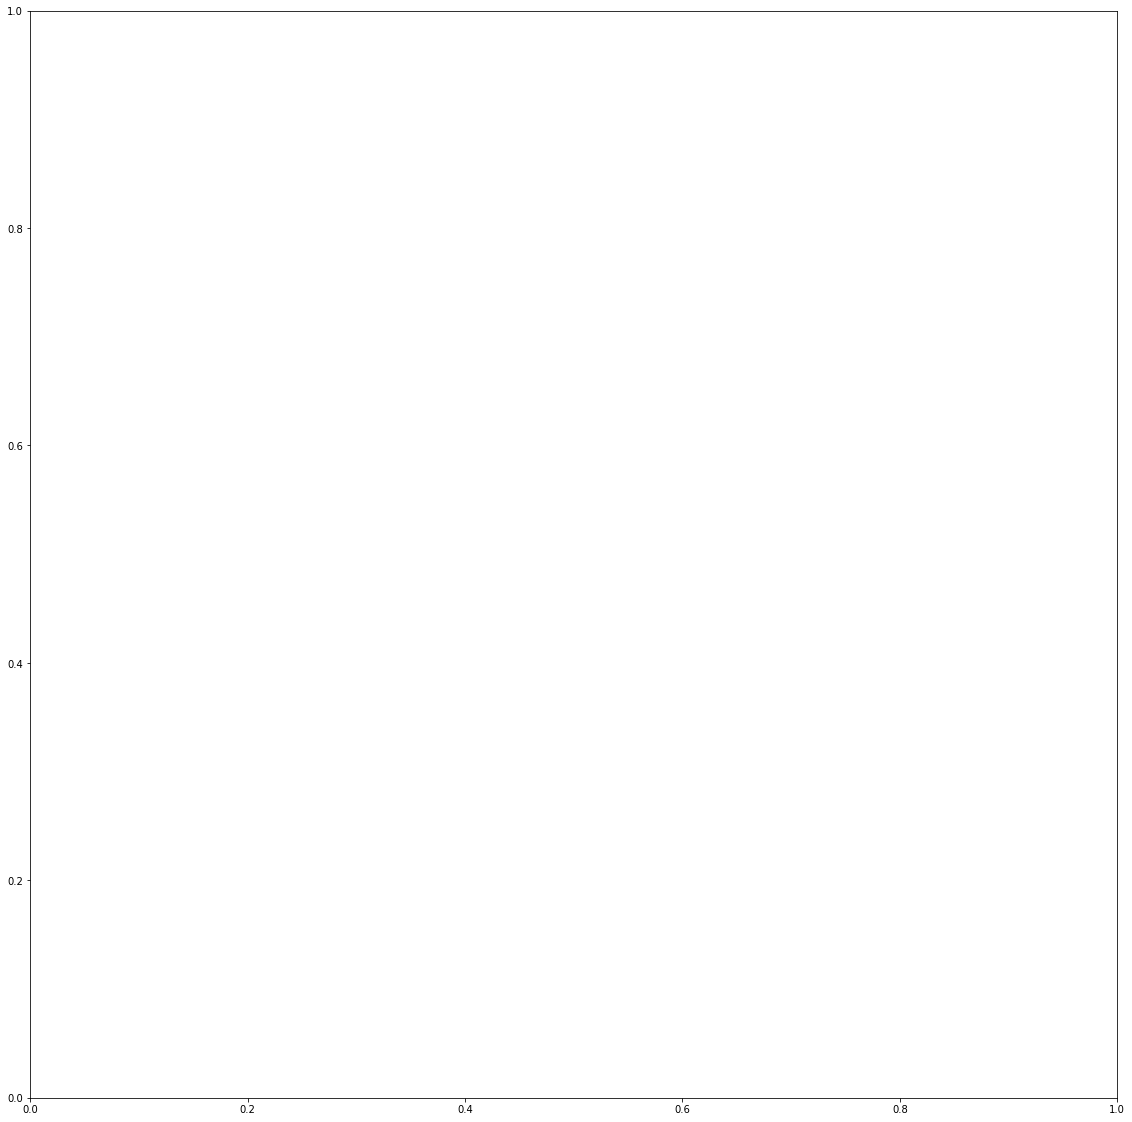

In [24]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

#!pip install opencv-python
from sklearn.tree import export_graphviz
export_graphviz(clf, 'tree.dot', feature_names = ["Age" , "Sex_Encoded"  ,"BP_Encoded" ,"Cholesterol_Encoded", "Na_to_K"])
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.dot')
plt.figure(figsize = (20, 20))
plt.imshow("tree.dot")

In [226]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0,

In [203]:
Z = y_train

In [204]:
w1 = np.random.rand(10,5)
b1 = np.random.rand(10)

w2 = np.random.rand(10,5)
b2 = np.random.rand(5)

In [205]:
b1

array([0.86903723, 0.2232127 , 0.19309942, 0.38291247, 0.90712287,
       0.71549068, 0.40410565, 0.42991692, 0.97190847, 0.33181493])

In [206]:
X_train.dot(w1.T)

,0,1,2,3,4,5,6,7,8,9
77,23.960985,28.632008,16.224384,21.594964,44.642320,42.729969,20.924630,1.889258,26.531081,38.240813
127,20.278669,32.004226,9.689131,13.177869,44.227545,42.535419,27.200357,2.947159,34.057798,36.428118
5,15.612450,21.573343,8.862864,11.860769,31.166899,29.727931,17.055269,0.818599,21.139038,26.795940
118,18.953299,28.977990,9.232896,13.438883,42.089882,40.367360,23.766699,1.815444,30.680702,34.443488
113,33.277570,55.476466,13.471829,20.299667,78.762657,75.520979,46.964072,2.654482,60.692731,63.811657
...,...,...,...,...,...,...,...,...,...,...
104,30.407469,30.253918,24.344817,30.296870,49.927616,47.960109,20.086951,2.953946,24.793098,43.890647
129,17.983049,28.371314,8.169805,11.549760,40.028267,38.261411,23.622207,0.997264,29.875931,33.343631
183,24.336864,34.271995,13.491436,18.811676,51.062499,48.942178,27.150920,2.011770,34.929056,42.391774
174,24.733106,37.803371,12.307282,16.765683,54.903517,52.906396,31.442105,3.018067,40.497202,44.471347


In [207]:
b1+X_train.dot(w1.T)

,0,1,2,3,4,5,6,7,8,9
77,24.830022,28.855221,16.417483,21.977877,45.549443,43.445460,21.328736,2.319175,27.502989,38.572628
127,21.147707,32.227438,9.882231,13.560781,45.134668,43.250909,27.604463,3.377076,35.029706,36.759933
5,16.481488,21.796555,9.055964,12.243681,32.074022,30.443422,17.459374,1.248515,22.110946,27.127754
118,19.822336,29.201203,9.425995,13.821796,42.997005,41.082850,24.170805,2.245361,31.652611,34.775303
113,34.146607,55.699678,13.664928,20.682579,79.669780,76.236470,47.368178,3.084399,61.664640,64.143472
...,...,...,...,...,...,...,...,...,...,...
104,31.276506,30.477130,24.537917,30.679782,50.834739,48.675600,20.491056,3.383863,25.765007,44.222462
129,18.852086,28.594527,8.362905,11.932672,40.935390,38.976902,24.026312,1.427181,30.847840,33.675446
183,25.205901,34.495208,13.684535,19.194588,51.969621,49.657669,27.555025,2.441687,35.900965,42.723589
174,25.602144,38.026584,12.500382,17.148596,55.810640,53.621887,31.846211,3.447984,41.469110,44.803162


In [208]:
M = 1 / (1 + np.exp(-(X_train.dot(w1.T)+b1)))
M=M

In [209]:
M.dot(w2)+b2


,0,1,2,3,4
77,6.912146,5.078228,6.254065,5.810146,5.127362
127,6.918042,5.100202,6.297102,5.861690,5.142584
5,6.898039,5.026274,6.152365,5.688374,5.091313
118,6.911429,5.075783,6.249296,5.804446,5.125648
113,6.916955,5.096045,6.288950,5.851921,5.139714
...,...,...,...,...,...
104,6.918106,5.100306,6.297294,5.861913,5.142669
129,6.901034,5.037674,6.174714,5.715155,5.099189
183,6.913143,5.081924,6.261301,5.818811,5.129924
174,6.918310,5.101073,6.298796,5.863713,5.143199


In [219]:
def forward_pro(X, w1, b1, w2 , b2):
    #first layer
    print(X.shape, w1.T.shape,b1.shape)
    #import pdb;pdb.set_trace()
    M = 1 / (1 + np.exp(-(X.dot(w1.T)+b1)))
    # second Layer
    print(M.shape,w2.shape,b2.shape)
    A = M.dot(w2)+b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis = 1, keepdims = True)
    #Y = A
    return Y, M

In [220]:
forward_pro(X_train.to_numpy(), w1, b1, w2, b2)

(140, 5) (5, 10) (10,)


ValueError: Length of passed values is 140, index implies 10.

In [221]:
# returns gradient for weight_2
def diff_wi_2(H, Z, Y):
    return H.T.dot(Z-Y)

In [213]:
# returns gradient for weight_1
def diff_wi_1(X, H, Z, output, wi_2):
    dZ = (Z - output).dot(wi_2.T) * H * (1-H)
    return X.T.dot(dZ)

In [214]:
# returns derivative for both bias
def diff_B2(Z, Y):
    return (Z - Y).sum(axis=0)

def diff_B1(Z, Y, Wi_2, H):
    return ((Z - Y).dot(Wi_2.T)* H * (1-H)).sum(axis=0)

In [222]:
lr = 1e-3
X = X_train.to_numpy()
for epoch in range(5000):
    output, hidden = forward_pro(X, w1, b1, w2, b2)
    w2 += lr * diff_wi_2(hidden, Z, output)
    b2 += lr * diff_B2( Z, output)
    w1 += lr * diff_wi_1(X, hidden, Z, output, w2).T
    b1 += lr * diff_B1(Z,output,w2, hidden)

(140, 5) (5, 10) (10,)


ValueError: Length of passed values is 140, index implies 10.

In [191]:
X_train.to_numpy()

array([[26.   ,  0.   ,  0.   ,  1.   , 19.161],
       [35.   ,  1.   ,  2.   ,  1.   ,  7.845],
       [22.   ,  0.   ,  2.   ,  0.   ,  8.607],
       [32.   ,  0.   ,  0.   ,  1.   , 10.292],
       [65.   ,  0.   ,  1.   ,  1.   , 13.769],
       [28.   ,  0.   ,  0.   ,  1.   , 18.809],
       [21.   ,  0.   ,  0.   ,  1.   , 28.632],
       [39.   ,  1.   ,  1.   ,  1.   , 13.938],
       [41.   ,  1.   ,  0.   ,  1.   , 15.156],
       [39.   ,  0.   ,  1.   ,  1.   , 22.697],
       [29.   ,  0.   ,  0.   ,  0.   , 29.45 ],
       [70.   ,  1.   ,  0.   ,  0.   ,  9.849],
       [61.   ,  0.   ,  1.   ,  1.   ,  7.34 ],
       [32.   ,  0.   ,  1.   ,  0.   ,  9.712],
       [36.   ,  0.   ,  0.   ,  0.   , 11.198],
       [45.   ,  0.   ,  0.   ,  0.   , 12.854],
       [58.   ,  0.   ,  0.   ,  1.   , 14.239],
       [53.   ,  1.   ,  1.   ,  0.   , 22.963],
       [49.   ,  1.   ,  0.   ,  1.   ,  6.269],
       [37.   ,  1.   ,  1.   ,  1.   ,  8.968],
       [57.   ,  1. 

In [ ]:
def sigmoid_derivative(x):
    return x * (1.0 - x)

In [ ]:
batch_size = 10
w1 = np.random.rand(5,10)
b1 = np.full((10, 10), 1)

w2 = np.random.rand(10,1)
b2 = np.full((10, 1), 1)
for eachEpoch in range(10):
    for eachBatchN in range(14):
        batch = X_train[eachBatchN*batch_size:(eachBatchN+1)*batch_size]
        label = y_train[eachBatchN*batch_size:(eachBatchN+1)*batch_size]
        h1 = np.matmul(batch,w1)+ b1
        h1_out = 1/(1 + np.exp(-h1)) # 
        
        h2 = np.matmul(h1_out, w2) + b2
        y_ = np.exp(h2)/sum(np.exp(h2))
        
        d_weights2 = np.dot(h1_out.T, (2*(label - y_) * sigmoid_derivative(y_)))
        d_weights1 = np.dot(batch.T,  (np.dot(2*(label - y_) * sigmoid_derivative(y_), w2.T) * sigmoid_derivative(h1_out)))

        # update the weights with the derivative (slope) of the loss function
        w1 += d_weights1
        w2 += d_weights2